# **IMPORTING PACKAGES**

In [1]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek

#Importing Packages
import pandas as pd
import numpy as np

#importing visualization metrics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# Import the warnings
import warnings

# configuration settings
%matplotlib inline
sns.set(color_codes=True)
warnings.filterwarnings('ignore') ## Surpress the warnings
pd.options.display.max_columns = None # Display all columns

# For Statistics
import scipy.stats as stats
from pandas_profiling import ProfileReport

#other packages
import math
from collections import Counter
from numpy import log

#for sorting dates
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import sort_dataframeby_monthorweek

#for time series analysis
import itertools
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#Loading SQL extension
%load_ext sql

#connecting sqlite database
%sql sqlite://

#show all data 
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

#**LOADING AND UNDERSTANDING DATA**

In [2]:
#Loading data from google drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

#getting paths to dataset
!ls '/content'

#reading data
data = '/content/Performance_database.xlsx'
df = pd.read_excel(data)

#making row one column headers then drop the first row
df.columns = df.iloc[0]
df.drop(df.index[0], inplace = True)


#removing white space before and end of every column
df.columns = df.columns.str.rstrip()
df.columns = df.columns.str.lstrip()

#columns to small letter then replace space with "-"
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()

#viewing first 5 rows
df.head()

Mounted at /content/drive
ala_roi_analysis1_combined.xlsx  drive
ala_roi_analysis2_combined.xlsx  Performance_database.xlsx
ala_roi_analysis3_combined.xlsx  sample_data
ala_roi_analysis4_combined.xlsx  student_analysis1.xlsx


,ala_student_number,ala_entry_year,ala_exit_date,time_to_undergrad_enrol_(months),passport_country,gender,socio-economic_status_(ses)_category,roi_percentage,ala_financial_aid_(1_year_total),university_financial_aid,undergrad_1_affiliation_number,undergrad_1_org._account_name,undergrad_1_affiliation_country,undergrad_1_graduation_status,undergrad_1_start_(fiscal_year),undergrad_1_start_date_(formatted),undergrad_end_fiscal_year,uni_end_date_(formatted),undergrad_1_course_of_study,undergrad_1_field_of_study,time_at_institution,undergrad_2_affiliation_number,undergrad_2organization_name,undergrad_2affiliation_country,undergrad_2graduation_status,undergrad_2_start_fy,undergrad_2_start_formatted,undergrad2start_date,undergrad_2_end_fy,undergrad_2_end_date_formatted,undergrad2end_date,undergrad2_course_of_study,undergrad2_field_of_study,undergrad2_time_at_institution,undergrad_3_affiliation_number,undergrad_3_organization_name,undergrad_3_affiliation_country,undergrad_3_graduation_status,undergrad_3_start_fy,undergrad_3_start_date,undergrad_3_end_fy,undergrad_3_end_date,undergrad_3_course_of_study,undergrad_3_field_of_study,undergrad_3_time_at_institution_(years),grad_affiliation_number,grad_organization_name,gradaffiliation_country,grad_graduation_status,grad_start_date,grad_end_date,grad_field_of_study,grad_role,grad_2_affiliation_number,grad_2_organization_name,grad_2_affiliation_country,grad_2_graduation_status,grad_2_start_date,grad_2_end_date,grad_2_field_of_study,grad_2_role,undergraduate_start_year_(academic),undergrad_graduation_year_(fiscal),undergrad_graduation_year_(calendar),total_time_taken_to_graduation_(years),graduated_undergrad?(transfer_included)_current_status,graduated_in_5_years_or_less?,successful_1-2_year_transition?,time_between_graduation_(undergraduate)_and_employment
1,ALA2008-00002,2008,2010-06-30 00:00:00,18,South Africa,Female,1,n/a,450,Not Found,AF-039704,Rhodes University,South Africa,Graduated,2012,2012-01-01 00:00:00,2015,2014-12-28 00:00:00,Philosophy and Psychology,Social Sciences and Management,3,,,,,NaN,,,NaN,,,,,,,,,,NaN,,NaN,,,,,,,,,,,,,,,,,,,,,2012,2015,2014,3,YES,YES,YES,9 months
2,ALA2008-00003,2008,2010-06-30 00:00:00,2,Nigeria,Female,4,n/a,20000,Not Found,AF-039705,Clark University,USA,Graduated,2011,2010-09-01 00:00:00,2014,2014-05-31 00:00:00,Biology,STEM,3.7,,,,,NaN,,,NaN,,,,,,,,,,NaN,,NaN,,,,,AF-041669,Cornell University,USA,AF-041669,01/09/2014,30/06/2020,STEM,Enrolled,,,,,,,,,2010,2014,2014,3.7,YES,YES,YES,NaN
3,ALA2008-00005,2008,2010-06-30 00:00:00,2,Kenya,Female,1,n/a,1000,Not Found,AF-039691,Tufts University,USA,Graduated,2011,2010-09-01 00:00:00,2014,2014-06-28 00:00:00,Chemistry,STEM,3.8,,,,,NaN,,,NaN,,,,,,,,,,NaN,,NaN,,,,,AF-041768,Northeastern University,USA,AF-041768,01/09/2014,28/06/2016,STEM,Graduated,,,,,,,,,2010,2014,2014,3.8,YES,YES,YES,3 months
4,ALA2008-00008,2008,2010-06-30 00:00:00,2,Nigeria,Male,1,n/a,1000,Not Found,AF-039692,Tufts University,USA,Graduated,2011,2010-09-01 00:00:00,2014,2014-06-28 00:00:00,Engineering - Chemical,STEM,3.8,,,,,NaN,,,NaN,,,,,,,,,,NaN,,NaN,,,,,AF-051281,Cornell Tech,USA,AF-051281,01/09/2017,31/05/2019,STEM,NaN,,,,,,,,,2010,2014,2014,3.8,YES,YES,YES,9 months
5,ALA2008-00009,2008,2010-06-30 00:00:00,2,Uganda,Male,4,n/a,12000,Not Found,AF-039693,University of Rochester,USA,Graduated,2011,2010-09-01 00:00:00,2014,2014-06-28 00:00:00,Electrical and Computer Engineering and Mathematics,STEM,3.8,,,,,NaN,,,NaN,,,,,,,,,,NaN,,NaN,,,,,,,,,,,,,,,,,,,,,2010,2014,2014,3.8,YES,YES,YES,Before Graduation


In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
df.dtypes

0
ala_student_number                                        object
ala_entry_year                                            object
ala_exit_date                                             object
time_to_undergrad_enrol_(months)                          object
passport_country                                          object
gender                                                    object
socio-economic_status_(ses)_category                      object
roi_percentage                                            object
ala_financial_aid_(1_year_total)                          object
university_financial_aid                                  object
undergrad_1_affiliation_number                            object
undergrad_1_org._account_name                             object
undergrad_1_affiliation_country                           object
undergrad_1_graduation_status                             object
undergrad_1_start_(fiscal_year)                           object
undergrad_1_start_date_

In [4]:
#finding the number of duplicated rows
print(df.duplicated().sum())

0


In [5]:
df.isnull().sum()

0
ala_student_number                                        0  
ala_entry_year                                            0  
ala_exit_date                                             0  
time_to_undergrad_enrol_(months)                          70 
passport_country                                          0  
gender                                                    0  
socio-economic_status_(ses)_category                      0  
roi_percentage                                            0  
ala_financial_aid_(1_year_total)                          0  
university_financial_aid                                  0  
undergrad_1_affiliation_number                            0  
undergrad_1_org._account_name                             0  
undergrad_1_affiliation_country                           37 
undergrad_1_graduation_status                             0  
undergrad_1_start_(fiscal_year)                           69 
undergrad_1_start_date_(formatted)                        69 
underg

In [6]:
df.describe()

,ala_student_number,ala_entry_year,ala_exit_date,time_to_undergrad_enrol_(months),passport_country,gender,socio-economic_status_(ses)_category,roi_percentage,ala_financial_aid_(1_year_total),university_financial_aid,undergrad_1_affiliation_number,undergrad_1_org._account_name,undergrad_1_affiliation_country,undergrad_1_graduation_status,undergrad_1_start_(fiscal_year),undergrad_1_start_date_(formatted),undergrad_end_fiscal_year,uni_end_date_(formatted),undergrad_1_course_of_study,undergrad_1_field_of_study,time_at_institution,undergrad_2_affiliation_number,undergrad_2organization_name,undergrad_2affiliation_country,undergrad_2graduation_status,undergrad_2_start_fy,undergrad_2_start_formatted,undergrad2start_date,undergrad_2_end_fy,undergrad_2_end_date_formatted,undergrad2end_date,undergrad2_course_of_study,undergrad2_field_of_study,undergrad2_time_at_institution,undergrad_3_affiliation_number,undergrad_3_organization_name,undergrad_3_affiliation_country,undergrad_3_graduation_status,undergrad_3_start_fy,undergrad_3_start_date,undergrad_3_end_fy,undergrad_3_end_date,undergrad_3_course_of_study,undergrad_3_field_of_study,undergrad_3_time_at_institution_(years),grad_affiliation_number,grad_organization_name,gradaffiliation_country,grad_graduation_status,grad_start_date,grad_end_date,grad_field_of_study,grad_role,grad_2_affiliation_number,grad_2_organization_name,grad_2_affiliation_country,grad_2_graduation_status,grad_2_start_date,grad_2_end_date,grad_2_field_of_study,grad_2_role,undergraduate_start_year_(academic),undergrad_graduation_year_(fiscal),undergrad_graduation_year_(calendar),total_time_taken_to_graduation_(years),graduated_undergrad?(transfer_included)_current_status,graduated_in_5_years_or_less?,successful_1-2_year_transition?,time_between_graduation_(undergraduate)_and_employment
count,922,922,922,852,922,922,922,922,922,922,922,922,885,922,853,853,853,853,872,922,910.0,922,922,922,922,31,922,922,31,922,922,919,919,922,922,922,922,922,2,922,2,922,922,922,922,922,922,921,922,922,922,908,914,922,922,922,922,922,922,922,922,922,922,922,922,922,922,922,347
unique,922,10,10,20,52,2,4,497,170,330,854,208,50,5,11,44,14,87,464,5,45.0,32,29,13,5,8,18,18,10,23,23,28,4,18,3,3,2,3,2,3,2,3,3,3,3,116,77,17,116,19,40,4,3,5,5,4,3,5,5,3,3,12,9,10,35,4,4,5,6
top,ALA2009-00108,2016,2018-06-30 00:00:00,2,Kenya,Female,1,n/a,1500,Not Found,Not Found,University of Rochester,USA,Graduated,2019,2018-09-01 00:00:00,2022,2022-05-31 00:00:00,Not Found,Social Sciences and Management,3.7,,,,,2018,,,2018,,,,,,,,,,2018,,2021,,,,,,,,,,,,,,,,,,,,,2018,Withdrew or currently enrolled,Withdrew or currently enrolled,Enrolled,YES,YES,YES,Before Graduation
freq,1,127,127,503,117,470,528,337,46,336,69,80,615,420,113,103,103,81,69,342,416.0,891,891,891,891,7,891,891,6,891,891,891,891,891,920,920,920,920,1,920,1,920,920,920,920,807,807,807,807,807,807,807,807,918,918,918,918,918,918,918,918,112,485,416,387,436,420,725,180


# **DATA ANALYSIS - ROI**

In [7]:
#since we are dealing with the students who go through AlA on scholarship ROI
# we select data where the ROI is Not N/A

ala_roi = df[df['roi_percentage'] != "n/a "]
ala_roi = ala_roi.astype({"ala_financial_aid_(1_year_total)":'float', "university_financial_aid":'float',"roi_percentage":'float'}) 
#ala_roi = df[df['roi_percentage'] != "n/a"]
#ala_roi = ala_roi.astype({"ala_financial_aid_(1_year_total)":'float', "university_financial_aid":'float',"roi_percentage":'float'}) 
print()

In [8]:
#highest roi
print("Maximum Roi\n")
print(ala_roi.roi_percentage.max())

print("\nMinimun Roi\n")
#lowest roi
print(ala_roi.roi_percentage.min())

print("\nAvarage Roi\n")
#avarage roi
print(ala_roi.roi_percentage.mean())


Maximum Roi

250640.0

Minimun Roi

0.0

Avarage Roi

13968.503127426056


In [9]:
#Analysing roi vs ala_financial_aid_(1_year_total) and university_financial_aid
ala_roi_analysis1 = ala_roi[["roi_percentage",	"ala_financial_aid_(1_year_total)","university_financial_aid"]]

ala_roi_analysis1_sum = ala_roi_analysis1.groupby(["ala_financial_aid_(1_year_total)"]).sum().reset_index()
ala_roi_analysis1_count = ala_roi_analysis1.groupby(["ala_financial_aid_(1_year_total)"]).count().reset_index()

ala_roi_analysis1_count.drop(["roi_percentage"], axis = 1, inplace = True)
ala_roi_analysis1_count.columns =["ala_financial_aid_(1_year_total)","young_leader_count"]
ala_roi_analysis1_combined = pd.merge(ala_roi_analysis1_sum,ala_roi_analysis1_count,how='left',
                                      left_on=("ala_financial_aid_(1_year_total)"),right_on=("ala_financial_aid_(1_year_total)"))

ala_roi_analysis1_combined.to_excel('ala_roi_analysis1_combined.xlsx')

In [10]:
ala_roi_analysis1_combined

,ala_financial_aid_(1_year_total),roi_percentage,university_financial_aid,young_leader_count
0,120.0,5.128467e+05,615416.00,3
1,150.0,1.117533e+06,1676300.00,8
2,210.0,1.142857e+04,24000.00,1
3,230.0,1.143270e+05,262952.00,1
4,240.0,1.103650e+05,264876.00,1
5,270.0,8.718519e+04,235400.00,1
6,286.0,3.216783e+04,92000.00,1
7,300.0,1.162239e+06,3486716.00,17
8,360.0,1.443844e+05,519784.00,2
9,367.0,6.949319e+04,255040.00,1


In [11]:
#ROI based on countries where students came from and amount of financial aid allocated

ala_roi_analysis2 = ala_roi[["roi_percentage",	"ala_financial_aid_(1_year_total)","university_financial_aid","passport_country"]]

ala_roi_analysis2_sum = ala_roi_analysis2.groupby(["passport_country"]).sum().reset_index()
ala_roi_analysis2_count = ala_roi_analysis2.groupby(["passport_country"]).count().reset_index()

ala_roi_analysis2_count.drop(["roi_percentage"], axis = 1, inplace = True)
ala_roi_analysis2_count.drop(["ala_financial_aid_(1_year_total)"], axis = 1, inplace = True)


ala_roi_analysis2_count.columns =["passport_country","young_leader_count"]
ala_roi_analysis2_combined = pd.merge(ala_roi_analysis2_sum,ala_roi_analysis2_count,how='left',
                                      left_on=("passport_country"),right_on=("passport_country"))

ala_roi_analysis2_combined.to_excel('ala_roi_analysis2_combined.xlsx')

In [12]:
ala_roi_analysis2_combined

,passport_country,roi_percentage,ala_financial_aid_(1_year_total),university_financial_aid,young_leader_count
0,Algeria,1.504200e+03,4500.0,67689.00,1
1,Angola,2.201389e+04,24990.0,545532.00,6
2,Benin,8.955360e+04,9870.0,462768.00,2
3,Botswana,5.340947e+04,10775.0,929536.00,5
4,Burkina Faso,1.162121e+05,7950.0,691392.00,4
5,Burundi,1.933132e+05,34800.0,1852664.00,8
6,Cameroon,7.506914e+04,21300.0,1530780.00,7
7,Cape Verde,4.587821e+04,9720.0,659320.00,3
8,Central African Rep,4.991200e+04,600.0,299472.00,1
9,Cote d’Ivoire,1.714606e+05,68550.0,3263628.00,19


In [13]:
#ROI based on countries where students came from and amount of financial aid allocated

ala_roi_analysis3 = ala_roi[["roi_percentage",	"ala_financial_aid_(1_year_total)","university_financial_aid","gender"]]

ala_roi_analysis3_sum = ala_roi_analysis3.groupby(["gender"]).sum().reset_index()
ala_roi_analysis3_count = ala_roi_analysis3.groupby(["gender"]).count().reset_index()

ala_roi_analysis3_count.drop(["roi_percentage"], axis = 1, inplace = True)
ala_roi_analysis3_count.drop(["ala_financial_aid_(1_year_total)"], axis = 1, inplace = True)


ala_roi_analysis3_count.columns =["gender","young_leader_count"]
ala_roi_analysis3_combined = pd.merge(ala_roi_analysis3_sum,ala_roi_analysis3_count,how='left',
                                      left_on=("gender"),right_on=("gender"))

ala_roi_analysis3_combined.to_excel('ala_roi_analysis3_combined.xlsx')

In [14]:
ala_roi_analysis3_combined

,gender,roi_percentage,ala_financial_aid_(1_year_total),university_financial_aid,young_leader_count
0,Female,2.911182e+06,2144728.0,50984373.79,300
1,Male,5.260392e+06,1849425.0,52544892.00,285


In [15]:
#ROI based on countries where students came from and amount of financial aid allocated

ala_roi_analysis4 = ala_roi[["roi_percentage",	"ala_financial_aid_(1_year_total)","university_financial_aid","ala_entry_year"]]

ala_roi_analysis4_sum = ala_roi_analysis4.groupby(["ala_entry_year"]).sum().reset_index()
ala_roi_analysis4_count = ala_roi_analysis4.groupby(["ala_entry_year"]).count().reset_index()

ala_roi_analysis4_count.drop(["roi_percentage"], axis = 1, inplace = True)
ala_roi_analysis4_count.drop(["ala_financial_aid_(1_year_total)"], axis = 1, inplace = True)


ala_roi_analysis4_count.columns =["ala_entry_year","young_leader_count"]
ala_roi_analysis4_combined = pd.merge(ala_roi_analysis4_sum,ala_roi_analysis4_count,how='left',
                                      left_on=("ala_entry_year"),right_on=("ala_entry_year"))

ala_roi_analysis4_combined.to_excel('ala_roi_analysis4_combined.xlsx')

In [16]:
ala_roi_analysis4_combined

,ala_entry_year,roi_percentage,ala_financial_aid_(1_year_total),university_financial_aid,young_leader_count
0,2008,4.784000e+04,600.0,287040.00,1
1,2009,4.415467e+04,3600.0,339744.00,2
2,2011,8.507757e+05,378700.0,13487444.00,71
3,2012,9.909044e+05,520960.0,15378408.00,86
4,2013,1.204882e+06,654536.0,16302733.00,91
5,2014,1.556044e+06,678287.0,15658285.00,83
6,2015,1.082028e+06,537021.0,13995139.00,79
7,2016,1.488087e+06,716240.0,15618625.31,105
8,2017,9.068583e+05,504209.0,12461847.48,67


# **DATA ANALYSIS - STUDENT UNDERGRAND 1**

In [17]:
student_analysis = df[['undergrad_1_affiliation_number', 'undergrad_1_org._account_name',
       'undergrad_1_affiliation_country', 'undergrad_1_graduation_status',
       'undergrad_1_start_(fiscal_year)', 'undergrad_1_start_date_(formatted)',
       'undergrad_end_fiscal_year', 'uni_end_date_(formatted)',
       'undergrad_1_course_of_study', 'undergrad_1_field_of_study','gender',
       'time_at_institution']]

student_analysis = student_analysis[student_analysis['undergrad_1_affiliation_number'] != 'Not Found']
student_analysis.head()

,undergrad_1_affiliation_number,undergrad_1_org._account_name,undergrad_1_affiliation_country,undergrad_1_graduation_status,undergrad_1_start_(fiscal_year),undergrad_1_start_date_(formatted),undergrad_end_fiscal_year,uni_end_date_(formatted),undergrad_1_course_of_study,undergrad_1_field_of_study,gender,time_at_institution
1,AF-039704,Rhodes University,South Africa,Graduated,2012,2012-01-01 00:00:00,2015,2014-12-28 00:00:00,Philosophy and Psychology,Social Sciences and Management,Female,3
2,AF-039705,Clark University,USA,Graduated,2011,2010-09-01 00:00:00,2014,2014-05-31 00:00:00,Biology,STEM,Female,3.7
3,AF-039691,Tufts University,USA,Graduated,2011,2010-09-01 00:00:00,2014,2014-06-28 00:00:00,Chemistry,STEM,Female,3.8
4,AF-039692,Tufts University,USA,Graduated,2011,2010-09-01 00:00:00,2014,2014-06-28 00:00:00,Engineering - Chemical,STEM,Male,3.8
5,AF-039693,University of Rochester,USA,Graduated,2011,2010-09-01 00:00:00,2014,2014-06-28 00:00:00,Electrical and Computer Engineering and Mathematics,STEM,Male,3.8


In [18]:
student_analysis = student_analysis.astype({"time_at_institution":'float'}) 
#maximum time at inistitution
print("Maximum time at inistitution\n")
print(student_analysis.time_at_institution.max())

print("\nMinimun time at inistitution\n")
#minimum time at inistitution
print(student_analysis.time_at_institution.min())

print("\nAvarage time at inistitution\n")
#avarage time at inistitution
print(student_analysis.time_at_institution.mean())

Maximum time at inistitution

7.3

Minimun time at inistitution

0.1

Avarage time at inistitution

3.6898929845421784


In [19]:
#how many student proceeded to undegraduate studies
student_analysis.describe()

,time_at_institution
count,841.000000
mean,3.689893
std,0.668798
min,0.100000
25%,3.700000
50%,3.700000
75%,3.800000
max,7.300000


In [20]:
#loading data to sql for analysis
%sql drop table if exists student_analysis;
%sql persist student_analysis;

 * sqlite://
Done.
 * sqlite://


'Persisted student_analysis'

In [21]:
%%sql
select count(undergrad_1_affiliation_number) 
from student_analysis 
where undergrad_1_affiliation_number<>"Not Found" ;

 * sqlite://
Done.


count(undergrad_1_affiliation_number)
853


In [22]:
%%sql
select undergrad_1_affiliation_country, count(undergrad_1_affiliation_country)
from student_analysis 
where undergrad_1_affiliation_number<>"Not Found"
group by undergrad_1_affiliation_country
order by count(undergrad_1_affiliation_country) desc;

 * sqlite://
Done.


undergrad_1_affiliation_country,count(undergrad_1_affiliation_country)
USA,615
Canada,21
United Kingdom,21
Germany,20
South Africa,20
Mauritius,18
Kenya,14
Rwanda,13
Costa Rica,11
China,8


In [23]:
%%sql
select undergrad_1_field_of_study, count(undergrad_1_field_of_study)
from student_analysis 
where undergrad_1_field_of_study<>"Not Found"
group by undergrad_1_field_of_study
order by count(undergrad_1_field_of_study) desc;

 * sqlite://
Done.


undergrad_1_field_of_study,count(undergrad_1_field_of_study)
Social Sciences and Management,342
STEM,320
Unassigned,124
Humanities and Liberal Arts,67


In [24]:
%%sql
select gender, count(gender)
from student_analysis 
where undergrad_1_affiliation_number<>"Not Found"
group by gender
order by count(gender) desc;

 * sqlite://
Done.


gender,count(gender)
Female,435
Male,418


In [25]:
%%sql
select gender, undergrad_1_graduation_status,count(gender)
from student_analysis 
where undergrad_1_affiliation_number<>"Not Found"
group by gender, undergrad_1_graduation_status
order by count(gender) desc;

 * sqlite://
Done.


gender,undergrad_1_graduation_status,count(gender)
Female,Graduated,218
Male,Graduated,202
Female,Enrolled,190
Male,Enrolled,183
Male,Withdrawn,20
Female,Withdrawn,15
Male,Transfer,13
Female,Transfer,12


       undergrad_1_field_of_study  young_leader_count
0  Humanities and Liberal Arts     67                
1  Not Found                       69                
2  STEM                            320               
3  Social Sciences and Management  342               
4  Unassigned                      124               
________________________________



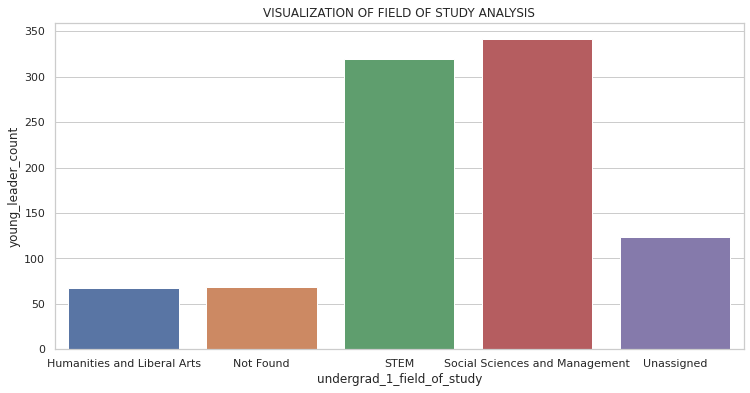

________________________________

   gender  young_leader_count
0  Female  470               
1  Male    452               
________________________________



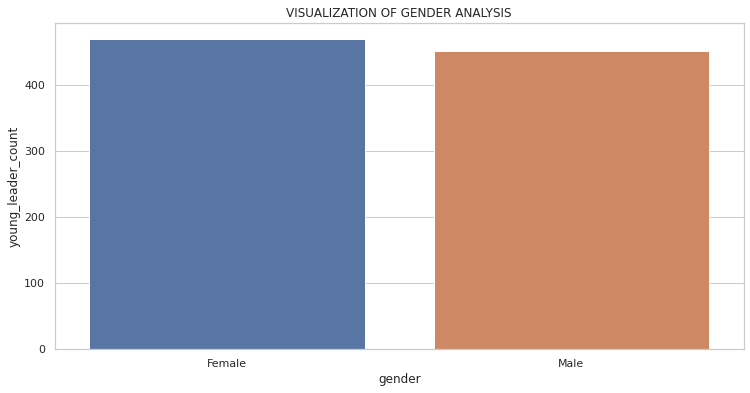

________________________________

  undergrad_1_graduation_status  young_leader_count
0  Enrolled                      373               
1  Graduated                     420               
2  Not Found                     69                
3  Transfer                      25                
4  Withdrawn                     35                
________________________________



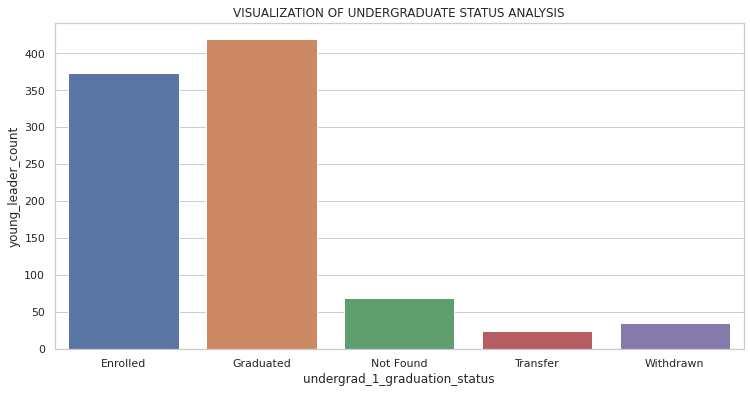

________________________________

   gender undergrad_1_graduation_status  young_leader_count
0  Female  Enrolled                      190               
1  Female  Graduated                     218               
2  Female  Not Found                     35                
3  Female  Transfer                      12                
4  Female  Withdrawn                     15                
5  Male    Enrolled                      183               
6  Male    Graduated                     202               
7  Male    Not Found                     34                
8  Male    Transfer                      13                
9  Male    Withdrawn                     20                
________________________________



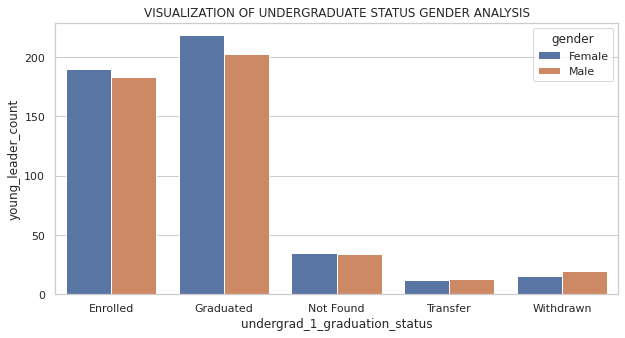

________________________________

   gender      undergrad_1_field_of_study  young_leader_count
0  Female  Humanities and Liberal Arts     44                
1  Female  Not Found                       35                
2  Female  STEM                            123               
3  Female  Social Sciences and Management  193               
4  Female  Unassigned                      75                
5  Male    Humanities and Liberal Arts     23                
6  Male    Not Found                       34                
7  Male    STEM                            197               
8  Male    Social Sciences and Management  149               
9  Male    Unassigned                      49                
________________________________



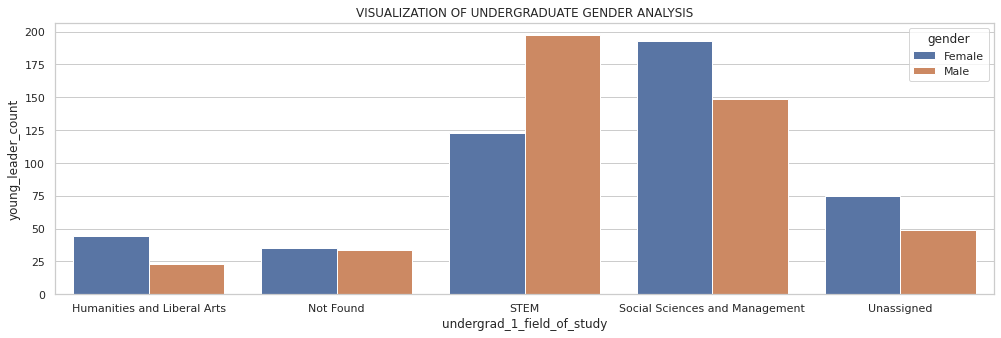

________________________________

   undergrad_1_graduation_status      undergrad_1_field_of_study  \
0   Enrolled                      Humanities and Liberal Arts      
1   Enrolled                      STEM                             
2   Enrolled                      Social Sciences and Management   
3   Enrolled                      Unassigned                       
4   Graduated                     Humanities and Liberal Arts      
5   Graduated                     STEM                             
6   Graduated                     Social Sciences and Management   
7   Graduated                     Unassigned                       
8   Not Found                     Not Found                        
9   Transfer                      Humanities and Liberal Arts      
10  Transfer                      STEM                             
11  Transfer                      Social Sciences and Management   
12  Transfer                      Unassigned                       
13  Withdrawn 

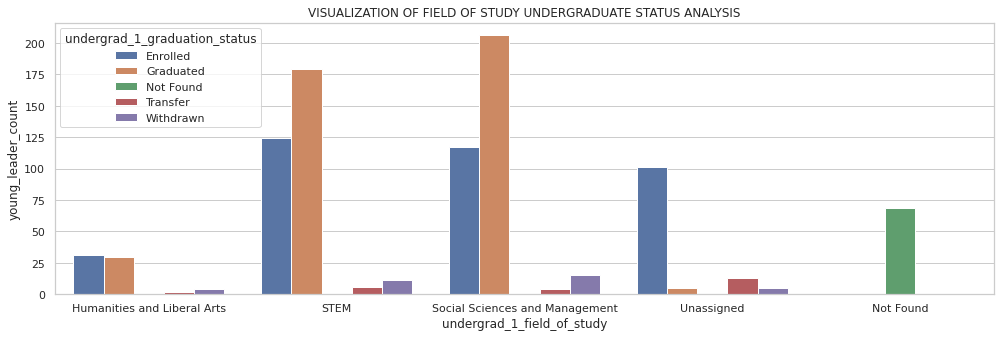

________________________________



In [26]:
#matlablib configurations
%matplotlib inline

#pulling undergrand 1 data

student_analysis2 = df[['undergrad_1_affiliation_number', 'undergrad_1_affiliation_country', 'undergrad_1_graduation_status',
                       'undergrad_end_fiscal_year', 'undergrad_1_course_of_study', 
                       'undergrad_1_field_of_study','gender']]

#FIELD OF STUDY ANALYSIS
student_analysis3= student_analysis2[['undergrad_1_field_of_study','undergrad_1_affiliation_number']]
student_analysis3.columns =['undergrad_1_field_of_study',"young_leader_count"]
student_analysis3 = student_analysis3.groupby(['undergrad_1_field_of_study']).count().reset_index()
print(student_analysis3)
print("________________________________\n")

#FIELD OF STUDY ANALYSIS graph
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(11,6))
ax = sns.barplot(x = student_analysis3['undergrad_1_field_of_study'],y = student_analysis3["young_leader_count"], data = student_analysis3)
ax.set_title("VISUALIZATION OF FIELD OF STUDY ANALYSIS")
plt.show()
print("________________________________\n")


#GENDER ANALYSIS
student_analysis4= student_analysis2[['gender','undergrad_1_affiliation_number']]
student_analysis4.columns =['gender',"young_leader_count"]
student_analysis4 = student_analysis4.groupby(['gender']).count().reset_index()
print(student_analysis4)
print("________________________________\n")

#GENDER ANALYSIS graph
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(11,6))
ax = sns.barplot(x = student_analysis4['gender'],y = student_analysis4["young_leader_count"], data = student_analysis4)
ax.set_title("VISUALIZATION OF GENDER ANALYSIS")
plt.show()
print("________________________________\n")


#UNDERGRADUATE STATUS ANALYSIS
student_analysis5= student_analysis2[['undergrad_1_graduation_status','undergrad_1_affiliation_number']]
student_analysis5.columns =['undergrad_1_graduation_status',"young_leader_count"]
student_analysis5 = student_analysis5.groupby(['undergrad_1_graduation_status']).count().reset_index()
print(student_analysis5)
print("________________________________\n")

#UNDERGRADUATE STATUS  PLOT
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(11,6))
ax = sns.barplot(x = student_analysis5['undergrad_1_graduation_status'],y = student_analysis5["young_leader_count"], data = student_analysis5)
ax.set_title("VISUALIZATION OF UNDERGRADUATE STATUS ANALYSIS")
plt.show()
print("________________________________\n")


#UNDERGRADUATE STATUS GENDER ANALYSIS
student_analysis6= student_analysis2[['gender','undergrad_1_graduation_status','undergrad_1_affiliation_number']]
student_analysis6 = student_analysis6.groupby(['gender','undergrad_1_graduation_status']).count().reset_index()
student_analysis6.columns =['gender','undergrad_1_graduation_status',"young_leader_count"]
print(student_analysis6)
print("________________________________\n")

#UNDERGRADUATE STATUS GENDER ANALYSIS PLOT
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.barplot(x = student_analysis6['undergrad_1_graduation_status'], y = student_analysis6["young_leader_count"], hue = student_analysis6["gender"],data = student_analysis6)
ax.set_title("VISUALIZATION OF UNDERGRADUATE STATUS GENDER ANALYSIS")
plt.show()
print("________________________________\n")


#FIELD OF STUDY GENDER ANALYSIS
student_analysis7= student_analysis2[['gender','undergrad_1_field_of_study','undergrad_1_affiliation_number']]
student_analysis7 = student_analysis7.groupby(['gender','undergrad_1_field_of_study']).count().reset_index()
student_analysis7.columns =['gender','undergrad_1_field_of_study',"young_leader_count"]
print(student_analysis7)
print("________________________________\n")

#FIELD OF STUDY GENDER ANALYSIS PLOT
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x = student_analysis7['undergrad_1_field_of_study'], y = student_analysis7["young_leader_count"], hue = student_analysis7["gender"],data = student_analysis7)
ax.set_title("VISUALIZATION OF UNDERGRADUATE GENDER ANALYSIS")
plt.show()
print("________________________________\n")

#FIELD OF STUDY UNDERGRADUATE STATUS ANALYSIS
student_analysis8= student_analysis2[['undergrad_1_graduation_status','undergrad_1_field_of_study','undergrad_1_affiliation_number']]
student_analysis8 = student_analysis8.groupby(['undergrad_1_graduation_status','undergrad_1_field_of_study']).count().reset_index()
student_analysis8.columns =['undergrad_1_graduation_status','undergrad_1_field_of_study',"young_leader_count"]
print(student_analysis8)
print("________________________________\n")

#FIELD OF STUDY UNDERGRADUATE STATUS ANALYSIS PLOT
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x = student_analysis8['undergrad_1_field_of_study'], y = student_analysis8["young_leader_count"], hue = student_analysis8['undergrad_1_graduation_status'],data = student_analysis8)
ax.set_title("VISUALIZATION OF FIELD OF STUDY UNDERGRADUATE STATUS ANALYSIS")
plt.show()
print("________________________________\n")


# **DATA ANALYSIS - STUDENT UNDERGRAND 2**

In [27]:
student_analysis = df[['undergrad_2_affiliation_number',
       'undergrad_2organization_name', 'undergrad_2affiliation_country',
       'undergrad_2graduation_status', 'undergrad_2_start_fy',
       'undergrad_2_start_formatted', 'undergrad2start_date',
       'undergrad_2_end_fy', 'undergrad_2_end_date_formatted',
       'undergrad2end_date', 'undergrad2_course_of_study',
       'undergrad2_field_of_study', 'undergrad2_time_at_institution','gender']]

student_analysis = student_analysis[~student_analysis['undergrad_2_end_fy'].isnull()]
student_analysis.head()

,undergrad_2_affiliation_number,undergrad_2organization_name,undergrad_2affiliation_country,undergrad_2graduation_status,undergrad_2_start_fy,undergrad_2_start_formatted,undergrad2start_date,undergrad_2_end_fy,undergrad_2_end_date_formatted,undergrad2end_date,undergrad2_course_of_study,undergrad2_field_of_study,undergrad2_time_at_institution,gender
44,AF-039662,Boston College-South Africa,South Africa,Graduated,2014,2014-02-01 00:00:00,01/02/2014,2018,2017-12-31 00:00:00,31/12/2017,Bachelor of Commerce,Social Sciences and Management,3.9,Female
47,AF-045279,University of Johannesburg,South Africa,Graduated,2016,2016-01-01 00:00:00,01/01/2016,2019,2018-12-31 00:00:00,31/12/2018,Social Science,Social Sciences and Management,3,Female
66,AF-039689,University of Cape Town,South Africa,Graduated,2014,2014-01-01 00:00:00,01/01/2014,2015,2014-12-28 00:00:00,28/12/2014,B.Com Economics and Finance,Social Sciences and Management,1,Female
70,AF-039707,"Richmond, The American International University in London",United Kingdom,Graduated,2013,2012-09-01 00:00:00,01/09/2012,2016,2015-12-28 00:00:00,28/12/2015,International and Development Economics,Social Sciences and Management,3.3,Female
87,AF-039319,Tufts University,USA,Graduated,2013,2012-09-01 00:00:00,01/09/2012,2015,2015-06-28 00:00:00,28/06/2015,Major in International Relations with a focus on Economic Development,Social Sciences and Management,2.8,Female


In [28]:
student_analysis0 = student_analysis[student_analysis['undergrad2_time_at_institution'] != 'Not Found']
#student_analysis0 = student_analysis0.astype({"undergrad2_time_at_institution":'float'}) 
#maximum time at inistitution
print("Maximum time at inistitution\n")
print(student_analysis0.undergrad2_time_at_institution.max())

print("\nMinimun time at inistitution\n")
#minimum time at inistitution
print(student_analysis0.undergrad2_time_at_institution.min())

print("\nAvarage time at inistitution\n")
#avarage time at inistitution
print(student_analysis0.undergrad2_time_at_institution.mean())

Maximum time at inistitution

4

Minimun time at inistitution

0.2

Avarage time at inistitution

2.7161290322580642


In [29]:
#how many student proceeded to undegraduate studies
student_analysis.describe()

,undergrad_2_affiliation_number,undergrad_2organization_name,undergrad_2affiliation_country,undergrad_2graduation_status,undergrad_2_start_fy,undergrad_2_start_formatted,undergrad2start_date,undergrad_2_end_fy,undergrad_2_end_date_formatted,undergrad2end_date,undergrad2_course_of_study,undergrad2_field_of_study,undergrad2_time_at_institution,gender
count,31,31,31,31,31,31,31,31,31,31,28,28,31.0,31
unique,31,28,12,4,8,17,17,10,22,22,27,3,17.0,2
top,AF-039689,African Leadership College Mauritius,USA,Graduated,2018,2012-09-01 00:00:00,01/09/2012,2018,2021-06-30 00:00:00,31/12/2017,Social Science,Social Sciences and Management,2.8,Male
freq,1,2,14,16,7,4,4,6,3,3,2,13,5.0,16


In [30]:
#loading data to sql for analysis
%sql drop table if exists student_analysis;
%sql persist student_analysis;

 * sqlite://
Done.
 * sqlite://


'Persisted student_analysis'

In [31]:
%%sql
select count(undergrad_2_affiliation_number) 
from student_analysis 
where undergrad_2_affiliation_number<>"Not Found" ;

 * sqlite://
Done.


count(undergrad_2_affiliation_number)
31


In [32]:
%%sql
select undergrad_2affiliation_country, count(undergrad_2affiliation_country)
from student_analysis 
where undergrad_2_affiliation_number<>"Not Found"
group by undergrad_2affiliation_country
order by count(undergrad_2affiliation_country) desc;

 * sqlite://
Done.


undergrad_2affiliation_country,count(undergrad_2affiliation_country)
USA,14
South Africa,4
United Kingdom,3
Mauritius,2
Canada,1
France,1
Italy,1
Kenya,1
Niger,1
Nigeria,1


In [33]:
%%sql
select undergrad2_field_of_study, count(undergrad2_field_of_study)
from student_analysis 
where undergrad2_field_of_study<>"Not Found"
group by undergrad2_field_of_study
order by count(undergrad2_field_of_study) desc;

 * sqlite://
Done.


undergrad2_field_of_study,count(undergrad2_field_of_study)
Social Sciences and Management,13
STEM,8
Humanities and Liberal Arts,7


In [34]:
%%sql
select gender, count(gender)
from student_analysis 
group by gender
order by count(gender) desc;

 * sqlite://
Done.


gender,count(gender)
Male,16
Female,15


In [35]:
%%sql
select gender, undergrad_2graduation_status,count(gender)
from student_analysis 
where undergrad_2_affiliation_number<>"Not Found"
group by gender, undergrad_2graduation_status
order by count(gender) desc;

 * sqlite://
Done.


gender,undergrad_2graduation_status,count(gender)
Female,Graduated,10
Male,Enrolled,8
Male,Graduated,6
Female,Enrolled,4
Male,Transfer,2
Female,Withdrawn,1


        undergrad2_field_of_study  young_leader_count
0  Humanities and Liberal Arts     7                 
1  STEM                            8                 
2  Social Sciences and Management  13                
________________________________



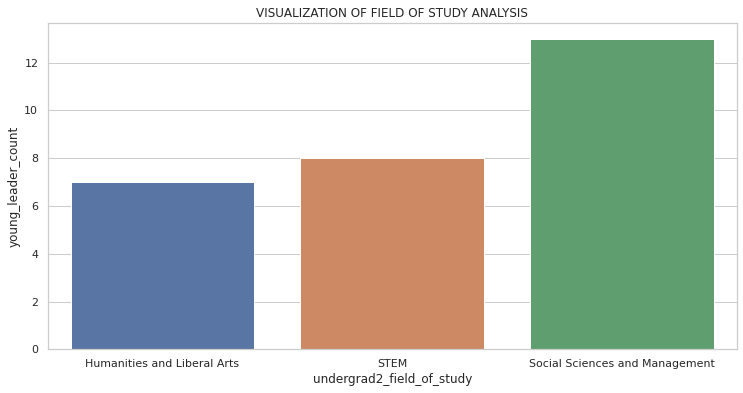

________________________________

   gender  young_leader_count
0  Female  15                
1  Male    16                
________________________________



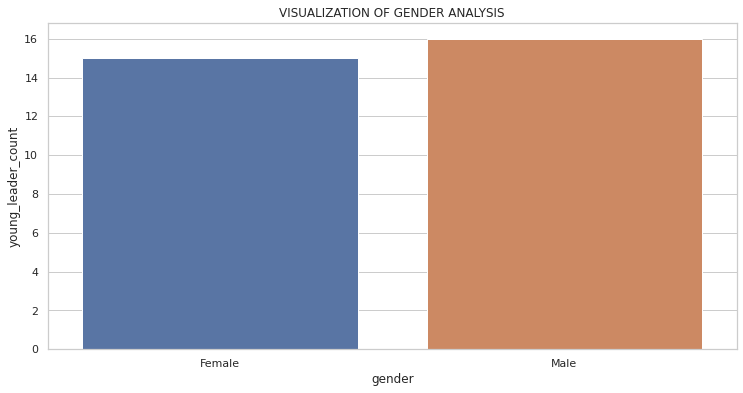

________________________________

  undergrad_2graduation_status  young_leader_count
0  Enrolled                     12                
1  Graduated                    16                
2  Transfer                     2                 
3  Withdrawn                    1                 
________________________________



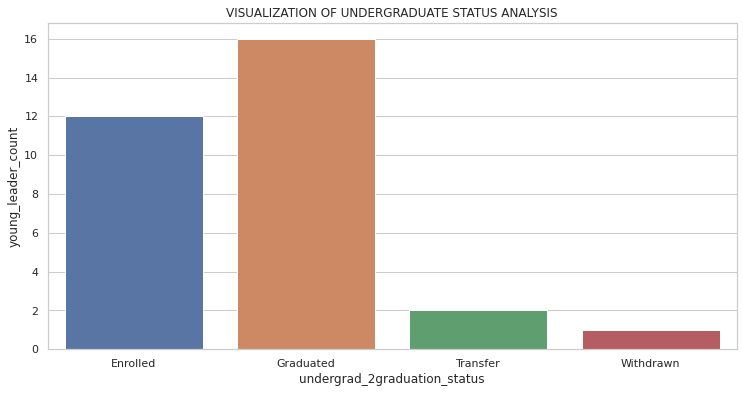

________________________________

   gender undergrad_2graduation_status  young_leader_count
0  Female  Enrolled                     4                 
1  Female  Graduated                    10                
2  Female  Withdrawn                    1                 
3  Male    Enrolled                     8                 
4  Male    Graduated                    6                 
5  Male    Transfer                     2                 
________________________________



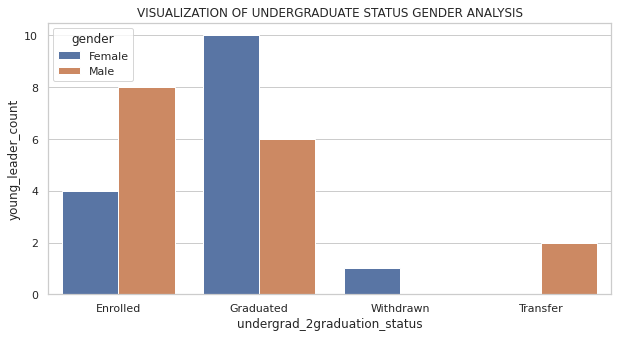

________________________________

   gender       undergrad2_field_of_study  young_leader_count
0  Female  Humanities and Liberal Arts     4                 
1  Female  STEM                            3                 
2  Female  Social Sciences and Management  7                 
3  Male    Humanities and Liberal Arts     3                 
4  Male    STEM                            5                 
5  Male    Social Sciences and Management  6                 
________________________________



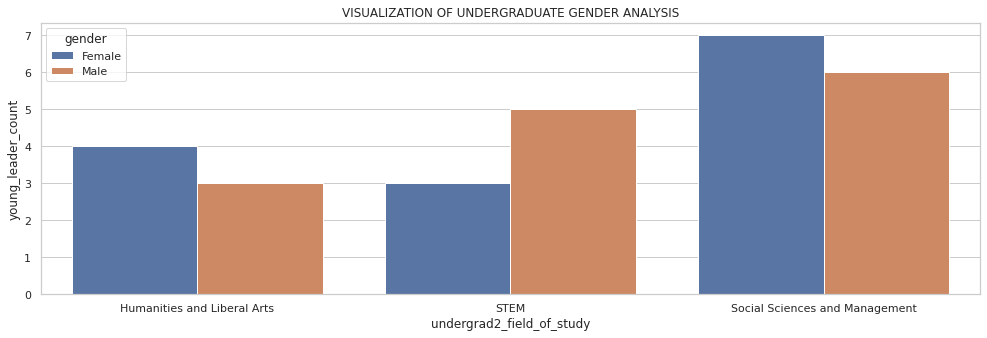

________________________________

  undergrad_2graduation_status       undergrad2_field_of_study  \
0  Enrolled                     Humanities and Liberal Arts      
1  Enrolled                     STEM                             
2  Enrolled                     Social Sciences and Management   
3  Graduated                    Humanities and Liberal Arts      
4  Graduated                    STEM                             
5  Graduated                    Social Sciences and Management   
6  Transfer                     Social Sciences and Management   

   young_leader_count  
0  5                   
1  3                   
2  3                   
3  2                   
4  5                   
5  9                   
6  1                   
________________________________



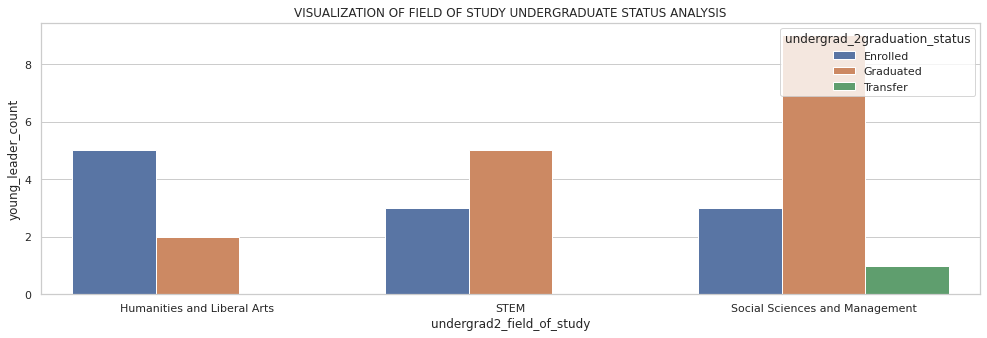

________________________________



In [36]:
#matlablib configurations
%matplotlib inline

#pulling undergrand 1 data

student_analysis2 = student_analysis[['undergrad_2_affiliation_number', 'undergrad_2affiliation_country', 'undergrad_2graduation_status',
                       'undergrad_2_start_fy', 'undergrad2_course_of_study', 
                       'undergrad2_field_of_study','gender']]

#FIELD OF STUDY ANALYSIS
student_analysis3= student_analysis2[['undergrad2_field_of_study','undergrad_2_affiliation_number']]
student_analysis3.columns =['undergrad2_field_of_study',"young_leader_count"]
student_analysis3 = student_analysis3.groupby(['undergrad2_field_of_study']).count().reset_index()
print(student_analysis3)
print("________________________________\n")

#FIELD OF STUDY ANALYSIS graph
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(11,6))
ax = sns.barplot(x = student_analysis3['undergrad2_field_of_study'],y = student_analysis3["young_leader_count"], data = student_analysis3)
ax.set_title("VISUALIZATION OF FIELD OF STUDY ANALYSIS")
plt.show()
print("________________________________\n")


#GENDER ANALYSIS
student_analysis4= student_analysis2[['gender','undergrad_2_affiliation_number']]
student_analysis4.columns =['gender',"young_leader_count"]
student_analysis4 = student_analysis4.groupby(['gender']).count().reset_index()
print(student_analysis4)
print("________________________________\n")

#GENDER ANALYSIS graph
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(11,6))
ax = sns.barplot(x = student_analysis4['gender'],y = student_analysis4["young_leader_count"], data = student_analysis4)
ax.set_title("VISUALIZATION OF GENDER ANALYSIS")
plt.show()
print("________________________________\n")


#UNDERGRADUATE STATUS ANALYSIS
student_analysis5= student_analysis2[['undergrad_2graduation_status','undergrad_2_affiliation_number']]
student_analysis5.columns =['undergrad_2graduation_status',"young_leader_count"]
student_analysis5 = student_analysis5.groupby(['undergrad_2graduation_status']).count().reset_index()
print(student_analysis5)
print("________________________________\n")

#UNDERGRADUATE STATUS  PLOT
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(11,6))
ax = sns.barplot(x = student_analysis5['undergrad_2graduation_status'],y = student_analysis5["young_leader_count"], data = student_analysis5)
ax.set_title("VISUALIZATION OF UNDERGRADUATE STATUS ANALYSIS")
plt.show()
print("________________________________\n")


#UNDERGRADUATE STATUS GENDER ANALYSIS
student_analysis6= student_analysis2[['gender','undergrad_2graduation_status','undergrad_2_affiliation_number']]
student_analysis6 = student_analysis6.groupby(['gender','undergrad_2graduation_status']).count().reset_index()
student_analysis6.columns =['gender','undergrad_2graduation_status',"young_leader_count"]
print(student_analysis6)
print("________________________________\n")

#UNDERGRADUATE STATUS GENDER ANALYSIS PLOT
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.barplot(x = student_analysis6['undergrad_2graduation_status'], y = student_analysis6["young_leader_count"], hue = student_analysis6["gender"],data = student_analysis6)
ax.set_title("VISUALIZATION OF UNDERGRADUATE STATUS GENDER ANALYSIS")
plt.show()
print("________________________________\n")


#FIELD OF STUDY GENDER ANALYSIS
student_analysis7= student_analysis2[['gender','undergrad2_field_of_study','undergrad_2_affiliation_number']]
student_analysis7 = student_analysis7.groupby(['gender','undergrad2_field_of_study']).count().reset_index()
student_analysis7.columns =['gender','undergrad2_field_of_study',"young_leader_count"]
print(student_analysis7)
print("________________________________\n")

#FIELD OF STUDY GENDER ANALYSIS PLOT
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x = student_analysis7['undergrad2_field_of_study'], y = student_analysis7["young_leader_count"], hue = student_analysis7["gender"],data = student_analysis7)
ax.set_title("VISUALIZATION OF UNDERGRADUATE GENDER ANALYSIS")
plt.show()
print("________________________________\n")

#FIELD OF STUDY UNDERGRADUATE STATUS ANALYSIS
student_analysis8= student_analysis2[['undergrad_2graduation_status','undergrad2_field_of_study','undergrad_2_affiliation_number']]
student_analysis8 = student_analysis8.groupby(['undergrad_2graduation_status','undergrad2_field_of_study']).count().reset_index()
student_analysis8.columns =['undergrad_2graduation_status','undergrad2_field_of_study',"young_leader_count"]
print(student_analysis8)
print("________________________________\n")

#FIELD OF STUDY UNDERGRADUATE STATUS ANALYSIS PLOT
sns.set(style ="whitegrid") 
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x = student_analysis8['undergrad2_field_of_study'], y = student_analysis8["young_leader_count"], hue = student_analysis8['undergrad_2graduation_status'],data = student_analysis8)
ax.set_title("VISUALIZATION OF FIELD OF STUDY UNDERGRADUATE STATUS ANALYSIS")
plt.show()
print("________________________________\n")
